<a href="https://colab.research.google.com/github/SsHhKim/Deep-Learning-with-Colab/blob/master/02_Cifar_100_model_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar-100

In [1]:
!mkdir model

In [2]:
!ls -l

total 8
drwxr-xr-x 2 root root 4096 Jul  7 05:33 model
drwxr-xr-x 1 root root 4096 Jun 26 16:26 sample_data


In [ ]:
%tensorflow_version 2.x    # gpu가 있는지 없는지 확인하는 코드
import tensorflow as tf
from tensorflow import keras
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.5582030049999958
GPU (s):
0.057612142999914795
GPU speedup over CPU: 61x


In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [20]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [23]:
Y_train = tf.keras.utils.to_categorical(y_train, 100)
Y_test = tf.keras.utils.to_categorical(y_test, 100)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Activation
import numpy as np

np.random.seed(0)

In [25]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [37]:
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [38]:
import os

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = MODEL_DIR + "Cifar{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [42]:
history = model.fit(X_train, Y_train, epochs=300, batch_size=50, 
                    validation_data=(X_test, Y_test), verbose=1, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 6s 113us/step - loss: 1.1604 - accuracy: 0.6543 - val_loss: 2.0331 - val_accuracy: 0.4931

Epoch 00001: val_loss improved from inf to 2.03305, saving model to ./model/Cifar01-2.0331.hdf5
Epoch 2/300
 1550/50000 [..............................] - ETA: 5s - loss: 1.1352 - accuracy: 0.6613

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


50000/50000 [==============================] - 6s 111us/step - loss: 1.1511 - accuracy: 0.6578 - val_loss: 2.0307 - val_accuracy: 0.4942

Epoch 00002: val_loss improved from 2.03305 to 2.03069, saving model to ./model/Cifar02-2.0307.hdf5
Epoch 3/300
50000/50000 [==============================] - 5s 108us/step - loss: 1.1430 - accuracy: 0.6578 - val_loss: 2.0415 - val_accuracy: 0.4964

Epoch 00003: val_loss did not improve from 2.03069
Epoch 4/300
50000/50000 [==============================] - 5s 108us/step - loss: 1.1347 - accuracy: 0.6597 - val_loss: 2.0378 - val_accuracy: 0.4951

Epoch 00004: val_loss did not improve from 2.03069
Epoch 5/300
50000/50000 [==============================] - 5s 110us/step - loss: 1.1229 - accuracy: 0.6659 - val_loss: 2.0453 - val_accuracy: 0.4951

Epoch 00005: val_loss did not improve from 2.03069
Epoch 6/300
50000/50000 [==============================] - 5s 110us/step - loss: 1.1256 - accuracy: 0.6648 - val_loss: 2.0533 - val_accuracy: 0.4969

Epoch 000

In [ ]:
from keras.models import load_model
del model
model = load_model('model/.hdf5')

In [44]:
# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy : 0.4960


In [46]:
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

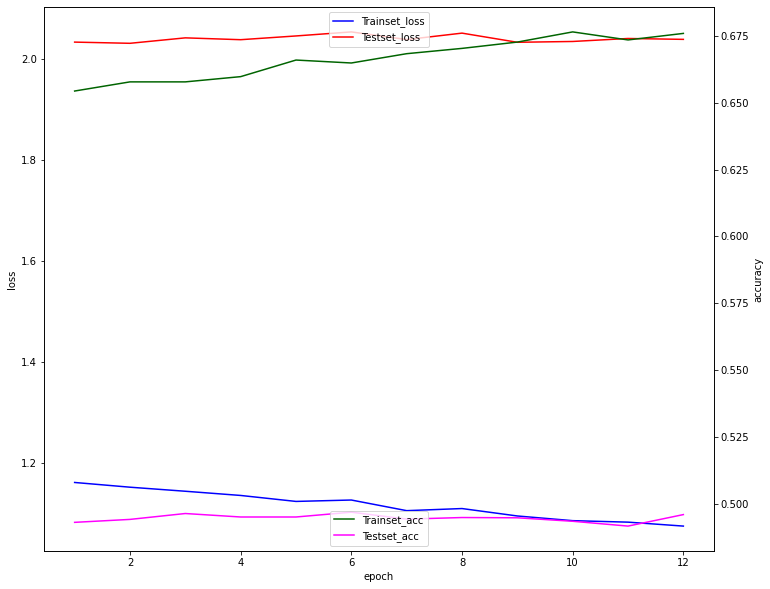

In [47]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,10))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()